In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import RandomizedSearchCV
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from collections import defaultdict



In [3]:
data1 = pd.read_csv("train.csv")
data1.head(1)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23


In [4]:
data1.columns = ["ItemID","X2", "FatContent", "Visibility", "Type", "MRP", "OutletID",
 "EstablishmentYear", "Size", "Location_Type", "Outlet_Type","Y"]


In [5]:
data1.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.65
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.60
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90


In [6]:
X = data1.drop("Y", axis=1)
Y = data1["Y"]

In [7]:
def transform_target(Y):
    return np.sqrt(np.exp(Y))

def inverse_transform_target(Y_transformed):
    return np.log(Y_transformed**2)

In [8]:
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

In [9]:
#get unique values of each categorical column
for col in categorical_features:
    print(f"Column: {col}")
    print(X[col].unique())

Column: ItemID
['FDA15' 'DRC01' 'FDN15' ... 'NCX17' 'FDH31' 'FDX13']
Column: FatContent
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Column: Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Column: OutletID
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Column: Size
['Medium' nan 'High' 'Small']
Column: Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Column: Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [10]:
#from ydata_profiling import ProfileReport

# Generate a profile report for data1
#profile = ProfileReport(data1, title="Data1 Profiling Report")

# To display the report in the Jupyter Notebook
#profile.to_notebook_iframe()

# Pipeline transformation

In [11]:
#visibility a lot of zeros

In [12]:
X.isnull().sum()

ItemID                  0
X2                   1006
FatContent              0
Visibility              0
Type                    0
MRP                     0
OutletID                0
EstablishmentYear       0
Size                 1711
Location_Type           0
Outlet_Type             0
dtype: int64

In [13]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [14]:
X.dtypes

ItemID                object
X2                   float64
FatContent            object
Visibility           float64
Type                  object
MRP                  float64
OutletID              object
EstablishmentYear      int64
Size                  object
Location_Type         object
Outlet_Type           object
dtype: object

In [15]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


this is just an initial pipeline for experementation, so KNN imputer would perform poorly as there are many unecessary features that will be removed later so we go by mode and change it to KNN at the end

In [16]:
OutletID = X["OutletID"]

In [17]:

class TypeMeanPriceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, smoothing=0):
        self.smoothing = smoothing
        self.category_mean_price = None
        self.global_type_mean = None

    def fit(self, X, y=None):
        if y is None:
            raise ValueError("Target variable `y` cannot be None in the fit method.")
        
        data_ = X.copy()
        data_['Y'] = y
        
        # Global mean for each Type across all OutletTypes
        self.global_type_mean = data_.groupby('Type')['Y'].mean()

        # Local mean and count for each (OutletType, Type)
        local_mean = data_.groupby(['Outlet_Type', 'Type'])['Y'].mean()
        local_count = data_.groupby(['Outlet_Type', 'Type'])['Y'].count()
        
        # Merge the global Type mean with the local statistics
        merged = local_mean.reset_index().merge(
            self.global_type_mean.reset_index(), on='Type', how='left', suffixes=('_local', '_global')
        )
        
        # Apply smoothing
        merged['TypeMeanPrice'] = (
            (merged['Y_local'] * local_count.values) + 
            (merged['Y_global'] * self.smoothing)
        ) / (local_count.values + self.smoothing)

        self.category_mean_price = merged[['Outlet_Type', 'Type', 'TypeMeanPrice']]
        return self

    def transform(self, X):
        X = X.copy()
        # Merge the smoothed means back into the original data
        X = pd.merge(X, self.category_mean_price, on=['Outlet_Type', 'Type'], how='left')
        #X['TypeMeanPrice'] = np.log1p(X['TypeMeanPrice'])
        return X[['TypeMeanPrice']]



In [18]:
X.columns

Index(['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
       'EstablishmentYear', 'Size', 'Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
class VisibilityZerosImputerZerosImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.item_Visibility_mean = defaultdict(lambda: None)  # Stores mean of Visibility per ItemID
        self.global_mean = None  # Fallback global mean for Visibility

    def fit(self, X, y=None):
        X = X.copy()

        # Ensure the required columns exist
        if 'ItemID' not in X.columns or 'Visibility' not in X.columns:
            raise ValueError("Both 'ItemID' and 'Visibility' columns must be present in the dataset.")

        # Ensure no None values in ItemID
        if X['ItemID'].isnull().any():
            raise ValueError("ItemID column contains None values.")

        # Calculate mean Visibility for each ItemID
        item_Visibility_mean = X.groupby('ItemID')['Visibility'].mean()
        self.item_Visibility_mean.update(item_Visibility_mean.to_dict())

        # Calculate global mean for the Visibility column
        if X['Visibility'].notnull().any():
            self.global_mean = X['Visibility'].mean()
        else:
            raise ValueError("Visibility column contains only NaN values.")

        return self

    def transform(self, X):
        X = X.copy()

        # Ensure the required columns exist
        if 'ItemID' not in X.columns or 'Visibility' not in X.columns:
            raise ValueError("Both 'ItemID' and 'Visibility' columns must be present in the dataset.")

        # Ensure no None values in ItemID
        if X['ItemID'].isnull().any():
            raise ValueError("ItemID column contains None values.")

        # Safely impute zero Visibilitys based on ItemID or global mean
        X['Visibility'] = X.apply(
            lambda row: self.item_Visibility_mean.get(row['ItemID'], self.global_mean)
            if row['Visibility'] == 0
            else row['Visibility'],
            axis=1
        )

        X['Visibility'] = X['Visibility'].replace(0, self.global_mean)
        X['Visibility'] = np.sqrt(X['Visibility'])

        return X[['Visibility']]


In [20]:
# Get the value counts of the 'ItemID' column
item_counts = X["ItemID"].value_counts()

# Filter the 'ItemID' values that appear more than once
items_with_multiple_entries = item_counts[item_counts > 1].index
print(items_with_multiple_entries.shape[0])
print(X['ItemID'].nunique())



1472
1553


so the imputer in effective in most cases

In [22]:
X.columns

Index(['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
       'EstablishmentYear', 'Size', 'Location_Type', 'Outlet_Type'],
      dtype='object')

In [23]:
print(X['FatContent'].value_counts())
print(X['Location_Type'].value_counts())
print(X['Outlet_Type'].value_counts())
print(X['Size'].value_counts())

FatContent
Low Fat    3595
Regular    2030
LF          220
reg          81
low fat      74
Name: count, dtype: int64
Location_Type
Tier 3    2358
Tier 2    1992
Tier 1    1650
Name: count, dtype: int64
Outlet_Type
Supermarket Type1    3967
Grocery Store         737
Supermarket Type3     659
Supermarket Type2     637
Name: count, dtype: int64
Size
Medium    1935
Small     1682
High       672
Name: count, dtype: int64


In [24]:
X['Category'] = X['ItemID'].apply(lambda x: x[:2])

In [25]:
X["FatContent"] = X["FatContent"].replace({"low fat": "LF", "Low Fat": "LF", "Regular": "REG", "reg": "REG"})
X.loc[X['Category'] == 'NC', 'FatContent'] = 'nofat'


In [26]:
X['FatContent'].value_counts()

FatContent
LF       2787
REG      2111
nofat    1102
Name: count, dtype: int64

In [27]:
class X2NaNsImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.item_X2_mode = defaultdict(lambda: None)  # Stores mode of X2 per ItemID
        self.global_mean = None  # Fallback global mean for X2
        
    def fit(self, X, y=None):
        X = X.copy()
        # Ensure the required columns exist
        if 'ItemID' not in X.columns or 'X2' not in X.columns:
            raise ValueError("Both 'ItemID' and 'X2' columns must be present in the dataset.")

        # Ensure no None values in ItemID
        if X['ItemID'].isnull().any():
            raise ValueError("ItemID column contains None values.")

        # Calculate mode X2 for each ItemID
        item_X2_mode = X.groupby('ItemID')['X2'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
        self.item_X2_mode.update(item_X2_mode.to_dict())

        # Calculate global mean for the X2 column
        if X['X2'].notnull().any():
            self.global_mean = X['X2'].mean()
        else:
            raise ValueError("X2 column contains only NaN values.")
        return self

    def transform(self, X):
        X = X.copy()

        # Ensure the required columns exist
        if 'ItemID' not in X.columns or 'X2' not in X.columns:
            raise ValueError("Both 'ItemID' and 'X2' columns must be present in the dataset.")

        # Ensure no None values in ItemID
        if X['ItemID'].isnull().any():
            raise ValueError("ItemID column contains None values.")

        # Safely impute NaN X2s based on ItemID or global mean
        X['X2'] = X.apply(
            lambda row: self.item_X2_mode.get(row['ItemID'], self.global_mean)
            if pd.isnull(row['X2'])
            else row['X2'],
            axis=1
        )

        X['X2'] = X['X2'].fillna(self.global_mean)
        X['X2'] = X['X2'].astype(float)

        return X[['X2']]

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
import pandas as pd

class KMeansClusterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters=5, random_state=42):
        """
        Parameters:
        - num_clusters: Number of clusters for KMeans.
        - random_state: Random state for reproducibility.
        """
        self.num_clusters = num_clusters
        self.random_state = random_state
        self.kmeans = None

    def fit(self, X, y=None):
        # Ensure X is a DataFrame
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
        
        # Fit the KMeans model
        self.kmeans = KMeans(n_clusters=self.num_clusters, random_state=self.random_state)
        self.kmeans.fit(X)
        return self

    def transform(self, X):
        # Ensure X is a DataFrame
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
        
        # Ensure the KMeans model is fitted
        if self.kmeans is None:
            raise ValueError("The KMeans model is not fitted yet. Please call 'fit' with appropriate arguments before using this method.")
        
        # Predict cluster labels
        cluster_labels = self.kmeans.predict(X)
        
        # Return only the cluster labels as a DataFrame
        return pd.DataFrame(cluster_labels, columns=X.columns, index=X.index)



In [29]:
X['MRP_cluster']=pd.cut(X['MRP'],bins=[25,69,137,203,270],labels=['very low','low','high','very high'],right=True)

In [30]:
ItemType = X['Type']

In [32]:
def categorize_item_type(item_type):
    if item_type in ['Dairy', 'Meat', 'Fruits and Vegetables']:
        return 'Perishable'
    elif item_type in ['Soft Drinks', 'Snack Foods', 'Frozen Foods']:
        return 'Packaged'
    else:
        return 'Others'

X['ItemCategory'] = X['Type'].apply(categorize_item_type)
ItemCategory = X['ItemCategory']


In [33]:

class CustomFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names
        # self.scaler_price_per_unit_weight = StandardScaler()
        # self.scaler_X2 = StandardScaler()
        # self.scaler_pricing_strategy = StandardScaler()

    def fit(self, X, y=None):
        # Convert to DataFrame with updated column names
        X = pd.DataFrame(X, columns=self.column_names)
        # Create new features
        # X['price_per_unit_weight'] = X['TypeMeanPrice_0'] / (X['X2'] + 0.0001)
        # X['pricing_strategy'] = X['MRP'] - (X['TypeMeanPrice_0'] * (X['Outlet_TypeOrdinal'] + 1) * (X['Location_Type'] + 1))
        
        # Fit the scalers on the training data
        # self.scaler_price_per_unit_weight.fit(X[['price_per_unit_weight']])
        # self.scaler_X2.fit(X[['X2']])
        # self.scaler_pricing_strategy.fit(X[['pricing_strategy']])
        
        return self

    def transform(self, X):
        # Convert to DataFrame with updated column names
        X = pd.DataFrame(X, columns=self.column_names)
        #X['OutletID'] = OutletID
       # X['OutletID'] = X['OutletID'].astype('category')
        
        #X['Total'] = Total_X
        # Convert object type features to float
        for col in X.select_dtypes(include=['object']).columns:
            X[col] = X[col].astype(float)
        # Create new features
        #X['BigMac_index2'] = (X['VisibilityCont'] + 0.0001) * (X['OutletType'] + 1) * (X['TypeMeanPrice'] + 3.24995) * (X['LocationType'] + 1)
        #X['price_per_unit_weight'] = X['TypeMeanPrice'] / (X['dummy'] + 0.0001)
        #X['BigMac_index2'] = np.sqrt(X['BigMac_index2'])
       # X['price_per_unit_weight'] = np.log1p(X['price_per_unit_weight'])
        #X['Visibility'] = X['Visibility'].rank(ascending=False)
        #X['ItemCategory'] = ItemCategory
        #X['OutletID'] = OutletID.astype(str)
        # X['MRP_Age_Interaction'] = X['MRP'] / (2010 - X['EstablishmentYear'])
        # X['MRP_Age_Interaction'] = np.log1p(X['MRP_Age_Interaction'])
        X.EstablishmentYear = X.EstablishmentYear.astype(str)
        X.MRP_cluster = X.MRP_cluster.astype(str)
        # X.Size = X.Size.astype(str)
        # X['ItemType'] = ItemType.astype(str)
        #X.ItemCategory = X.ItemCategory.astype('category')
        # X.FatContent = X.FatContent.astype(str)
        #X.X2 = X.X2.astype('category')
        #X.Visibility = X.Visibility.astype('category')
        #X.LocationType = X.LocationType.astype('category')
        # X['pricing_strategy'] = X['MRP'] - (X['TypeMeanPrice_0'] * (X['Outlet_TypeOrdinal'] + 1) * (X['Location_Type'] + 1))
        # X['RegionalPotential'] = X['Location_Type'] * (X['PastYearsCont'] + 1)
        # # Standard scale the new features
        # X['price_per_unit_weight'] = self.scaler_price_per_unit_weight.transform(X[['price_per_unit_weight']])
        # X['X2'] = self.scaler_X2.transform(X[['X2']])
        # X['pricing_strategy'] = self.scaler_pricing_strategy.transform(X[['pricing_strategy']])
        # Drop unwanted columns
        drop_columns = ['LocationType','Visibility','Size','FatContent','ItemType','MRP_Age_Interaction','EstablishmentYear']
        X.drop(columns=[col for col in drop_columns if col in X.columns], inplace=True)
        

        return X



In [35]:
from sklearn.base import BaseEstimator, TransformerMixin
class FrequencyImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.freqs = {}

    def fit(self, X, y=None):
        # Compute the frequency (count) of each category in each column
        if isinstance(X, pd.DataFrame):
            self.freqs = {col: X[col].value_counts() for col in X.columns}
        else:
            raise ValueError("Input must be a pandas DataFrame.")
        return self

    def transform(self, X):
        # Replace missing values with the frequency of each category
        X = X.copy()
        for col in X.columns:
            freq = self.freqs.get(col, None)
            if freq is not None:
                # Replace NaN values with the frequency count
                X[col] = X[col].apply(lambda x: freq[x] if pd.notna(x) else freq.idxmax() if pd.isna(x) else x)
        return X


In [36]:
X['Size'].fillna('Small', inplace=True)

C:\Users\shels\AppData\Local\Temp\ipykernel_29752\1989471734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Size'].fillna('Small', inplace=True)


In [37]:
X.isnull().sum()

ItemID                  0
X2                   1006
FatContent              0
Visibility              0
Type                    0
MRP                     0
OutletID                0
EstablishmentYear       0
Size                    0
Location_Type           0
Outlet_Type             0
Category                0
MRP_cluster             0
ItemCategory            0
dtype: int64

In [38]:
X.columns

Index(['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
       'EstablishmentYear', 'Size', 'Location_Type', 'Outlet_Type', 'Category',
       'MRP_cluster', 'ItemCategory'],
      dtype='object')

In [39]:
X['Visibility'] = np.sqrt(X['Visibility'])

In [40]:
X['FatContent'].value_counts()

FatContent
LF       2787
REG      2111
nofat    1102
Name: count, dtype: int64

In [41]:
print(X['Location_Type'].value_counts())
print(X['Size'].value_counts())
print(X['Category'].value_counts())

Location_Type
Tier 3    2358
Tier 2    1992
Tier 1    1650
Name: count, dtype: int64
Size
Small     3393
Medium    1935
High       672
Name: count, dtype: int64
Category
FD    4335
NC    1102
DR     563
Name: count, dtype: int64


In [42]:
X['Size'].isnull().sum()

0

In [43]:
X.Size.value_counts()

Size
Small     3393
Medium    1935
High       672
Name: count, dtype: int64

In [44]:
X.columns

Index(['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
       'EstablishmentYear', 'Size', 'Location_Type', 'Outlet_Type', 'Category',
       'MRP_cluster', 'ItemCategory'],
      dtype='object')

In [45]:
X['OutletID'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [46]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Category,MRP_cluster,ItemCategory
0,FDA15,9.30,LF,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,very high,Perishable
1,DRC01,5.92,REG,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,DR,very low,Packaged
2,FDN15,17.50,LF,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,high,Perishable
3,FDX07,19.20,REG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,FD,high,Perishable
4,NCD19,8.93,nofat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,NC,very low,Others


In [47]:
X2_imputer = X2NaNsImputer()
X.X2 = X2_imputer.fit_transform(X[['ItemID', 'X2']])

In [48]:
from sklearn.pipeline import FunctionTransformer
all_features = [ 'EstablishmentYear', 'MRP', 'Visibility','TypeMeanPrice',"OutletType",'MRP_cluster','LocationType','FatContent','Size']
target_encoder_cols = ['Type']
numerical_cols = ['EstablishmentYear', 'MRP','Visibility']
VisibilityZeros_cols = ['ItemID','Visibility']
X2_imputer_cols = ['X2','ItemID']
ordinal_cols = [ "Outlet_Type",'MRP_cluster','Location_Type','FatContent','Size']
TypeMeanPriceTransformer_col = ['Outlet_Type' ,'Type']
freq_imputer = ['Type']  # only one-hot encoding
ordinal_categories = [  # FatContent 
    ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
    ['very low','low','high','very high'] ,
    ['Tier 1', 'Tier 3', 'Tier 2'],
    ['nofat','LF', 'REG'],
    ['Small', 'Medium', 'High']
   # Size
]
# Define frequency imputer pipeline
frequency_imputer_pipeline = Pipeline([
    ("freq_imputer", FrequencyImputer())
])
# Define numerical pipeline
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent"))
    #,("scaler", StandardScaler())
])

# size_imputer_pipeline = Pipeline([
#     ("custom_size_imputer", SizeImputer()),
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("ordinal", OrdinalEncoder(categories=[['Small', 'Medium', 'High']]))
# ])
# Define pipeline for X2 with X2 imputer and KMeans transformer
x2_pipeline = Pipeline([
    ("X2_imputer", X2NaNsImputer()),
    ("kmeans", KMeansClusterTransformer(num_clusters=5, random_state=42))
])
type_mean_price_pipeline = Pipeline([
    ("type_mean_price_transformer", TypeMeanPriceTransformer(smoothing=0.5)),
    ("imputer", SimpleImputer(strategy="mean"))
])

# Define one-hot encoding pipeline
ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(categories=ordinal_categories))
])

# Define one-hot encoding pipeline for onehot-transform columns
onehot_transform_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(categories=[['Snack Foods', 'Frozen Foods', 'Fruits and Vegetables', 'Canned']], handle_unknown="ignore"))
])
# Define target encoding pipeline
target_encoding_pipeline = Pipeline([
    ("target_encoder", TargetEncoder(cols=target_encoder_cols , smoothing=0.5) )
])

# Combine all pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    #("X2_imputer", X2NaNsImputer(), X2_imputer_cols),
    #("kmeans_X2", KMeansClusterTransformer(num_clusters=5, random_state=42), ['X2']),
    #("kmeans_visibility", KMeansClusterTransformer(num_clusters=5, random_state=42), ['Visibility']),
    ("num", numerical_pipeline, numerical_cols),
    ("type_mean_price", type_mean_price_pipeline, TypeMeanPriceTransformer_col),
    ("ordinal", ordinal_pipeline, ordinal_cols)
    #("freq_imputer", frequency_imputer_pipeline, ['TypeFreq'])
    
])
# Define the final pipeline
# Create the extended pipeline
final_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("custom_features", CustomFeatureTransformer(column_names=all_features))
    #("kmeans", KMeansTransformer(num_clusters=5, random_state=42))
])
# Fit and transform the data
# Get the feature names after transformation

In [49]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Category,MRP_cluster,ItemCategory
0,FDA15,9.30,LF,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,very high,Perishable
1,DRC01,5.92,REG,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,DR,very low,Packaged
2,FDN15,17.50,LF,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,high,Perishable
3,FDX07,19.20,REG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,FD,high,Perishable
4,NCD19,8.93,nofat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,NC,very low,Others


In [50]:
X.isnull().sum()

ItemID               0
X2                   0
FatContent           0
Visibility           0
Type                 0
MRP                  0
OutletID             0
EstablishmentYear    0
Size                 0
Location_Type        0
Outlet_Type          0
Category             0
MRP_cluster          0
ItemCategory         0
dtype: int64

In [51]:
b = preprocessor.fit_transform(X,Y)
b = pd.DataFrame(b)
b.head()

,0,1,2,3,4,5,6,7,8
0,1999.0,249.8092,0.126678,7.535924,1.0,3.0,0.0,1.0,1.0
1,2009.0,48.2692,0.138846,7.245088,2.0,0.0,1.0,2.0,1.0
2,1999.0,141.6180,0.129461,7.549106,1.0,2.0,0.0,1.0,1.0
3,1998.0,182.0950,0.000000,5.542138,0.0,2.0,1.0,2.0,0.0
4,1987.0,53.8614,0.000000,7.559549,1.0,0.0,1.0,0.0,2.0


In [52]:
demo = final_pipeline.fit_transform(X,Y)

In [53]:
X_trans = final_pipeline.fit_transform(X,Y)
X_trans = pd.DataFrame(X_trans)

In [54]:
X_trans.head()

,MRP,TypeMeanPrice,OutletType,MRP_cluster
0,249.8092,7.535924,1.0,3.0
1,48.2692,7.245088,2.0,0.0
2,141.6180,7.549106,1.0,2.0
3,182.0950,5.542138,0.0,2.0
4,53.8614,7.559549,1.0,0.0


In [55]:
X_trans.dtypes

MRP              float64
TypeMeanPrice    float64
OutletType       float64
MRP_cluster       object
dtype: object

In [56]:
X_trans.dtypes


MRP              float64
TypeMeanPrice    float64
OutletType       float64
MRP_cluster       object
dtype: object

In [57]:
X_trans.head()

,MRP,TypeMeanPrice,OutletType,MRP_cluster
0,249.8092,7.535924,1.0,3.0
1,48.2692,7.245088,2.0,0.0
2,141.6180,7.549106,1.0,2.0
3,182.0950,5.542138,0.0,2.0
4,53.8614,7.559549,1.0,0.0


In [58]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Category,MRP_cluster,ItemCategory
0,FDA15,9.30,LF,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,very high,Perishable
1,DRC01,5.92,REG,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,DR,very low,Packaged
2,FDN15,17.50,LF,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,high,Perishable
3,FDX07,19.20,REG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,FD,high,Perishable
4,NCD19,8.93,nofat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,NC,very low,Others


In [59]:
X_trans.dtypes

MRP              float64
TypeMeanPrice    float64
OutletType       float64
MRP_cluster       object
dtype: object

In [60]:

#X_trans['outlier'] = X_trans
#X_trans.drop(['Snack Foods', 'Frozen Foods', 'Fruits and Vegetables', 'Canned' , 'X2','Visibility'], axis=1, inplace=True)

In [61]:
X_trans.head(20)

,MRP,TypeMeanPrice,OutletType,MRP_cluster
0,249.8092,7.535924,1.0,3.0
1,48.2692,7.245088,2.0,0.0
2,141.6180,7.549106,1.0,2.0
3,182.0950,5.542138,0.0,2.0
4,53.8614,7.559549,1.0,0.0
5,51.4008,7.325771,2.0,0.0
6,57.6588,7.556142,1.0,0.0
7,107.7622,8.067571,3.0,1.0
8,96.9726,7.473308,1.0,1.0
9,187.8214,7.473308,1.0,2.0


In [62]:
# X_trans['price_per_unit_weight'] = X_trans['MRP'] / (X_trans['X2'] + 0.0001)
# X_trans['price_per_unit_weight'] = np.log1p(X_trans['price_per_unit_weight'])

In [63]:
X_trans

,MRP,TypeMeanPrice,OutletType,MRP_cluster
0,249.8092,7.535924,1.0,3.0
1,48.2692,7.245088,2.0,0.0
2,141.6180,7.549106,1.0,2.0
3,182.0950,5.542138,0.0,2.0
4,53.8614,7.559549,1.0,0.0
...,...,...,...,...
5995,94.7778,7.568137,1.0,1.0
5996,58.6246,7.473308,1.0,0.0
5997,60.4536,7.568137,1.0,0.0
5998,195.8452,7.359238,1.0,2.0


In [64]:
X_trans.describe()

,MRP,TypeMeanPrice,OutletType
count,6000.000000,6000.000000,6000.000000
mean,141.228200,7.304467,1.203000
std,62.540569,0.682591,0.791978
min,31.290000,5.363176,0.000000
25%,94.037650,7.359238,1.000000
50%,143.197000,7.535924,1.000000
75%,186.522050,7.559549,1.000000
max,266.888400,8.137573,3.000000


array([[<Axes: title={'center': 'MRP'}>,
        <Axes: title={'center': 'TypeMeanPrice'}>],
       [<Axes: title={'center': 'OutletType'}>, <Axes: >]], dtype=object)

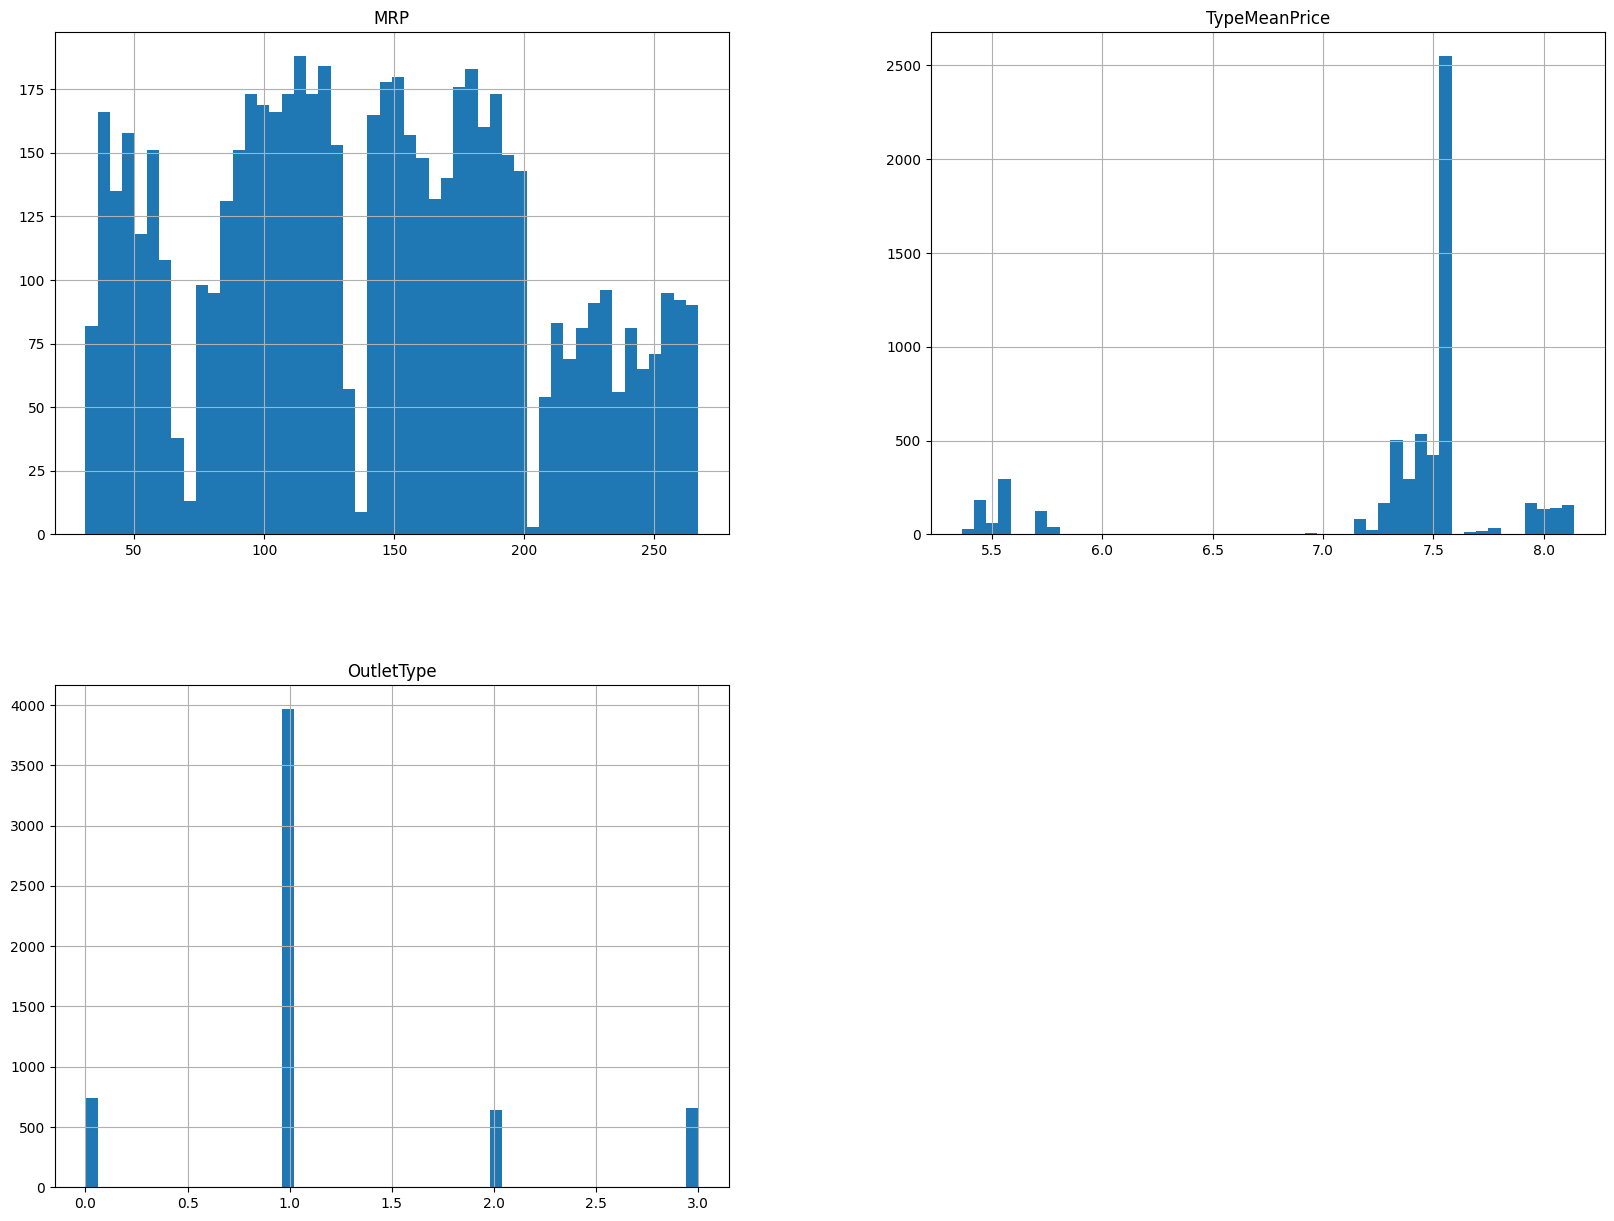

In [65]:
X_trans.hist(bins=50, figsize=(20,15))

In [66]:
#XGBoost Best Parameters: {'n_estimators': 749, 'learning_rate': 0.01396703849259381, 'max_depth': 3, 'subsample': 0.6779473083440211, 'colsample_bytree': 0.8971352425795299, 'reg_alpha': 4.910461682753882, 'reg_lambda': 0.8680441455872887, 'min_child_weight': 9, 'gamma': 4.988525528015604, 'max_bin': 362}
#XGBoost Best MAE: 0.3999827023283641
# XGBoost Best Parameters: {'n_estimators': 669, 'learning_rate': 0.06035467909986324, 'max_depth': 6, 'subsample': 0.923204157140139, 'colsample_bytree': 0.4883434932394659, 'reg_alpha': 5.410450954065299, 'reg_lambda': 1.1186894717633518, 'min_child_weight': 5, 'gamma': 2.3596898720558754, 'max_bin': 300}
# XGBoost Best MAE: 0.4007986806933085  emafrood di tegib 0.372


In [67]:
X.dtypes

ItemID                 object
X2                    float64
FatContent             object
Visibility            float64
Type                   object
MRP                   float64
OutletID               object
EstablishmentYear       int64
Size                   object
Location_Type          object
Outlet_Type            object
Category               object
MRP_cluster          category
ItemCategory           object
dtype: object

In [68]:
# Ensure 'percentages_df' index is properly set for quick lookups
# Initialize new feature columns in X



array([[<Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'Visibility'}>],
       [<Axes: title={'center': 'MRP'}>,
        <Axes: title={'center': 'EstablishmentYear'}>]], dtype=object)

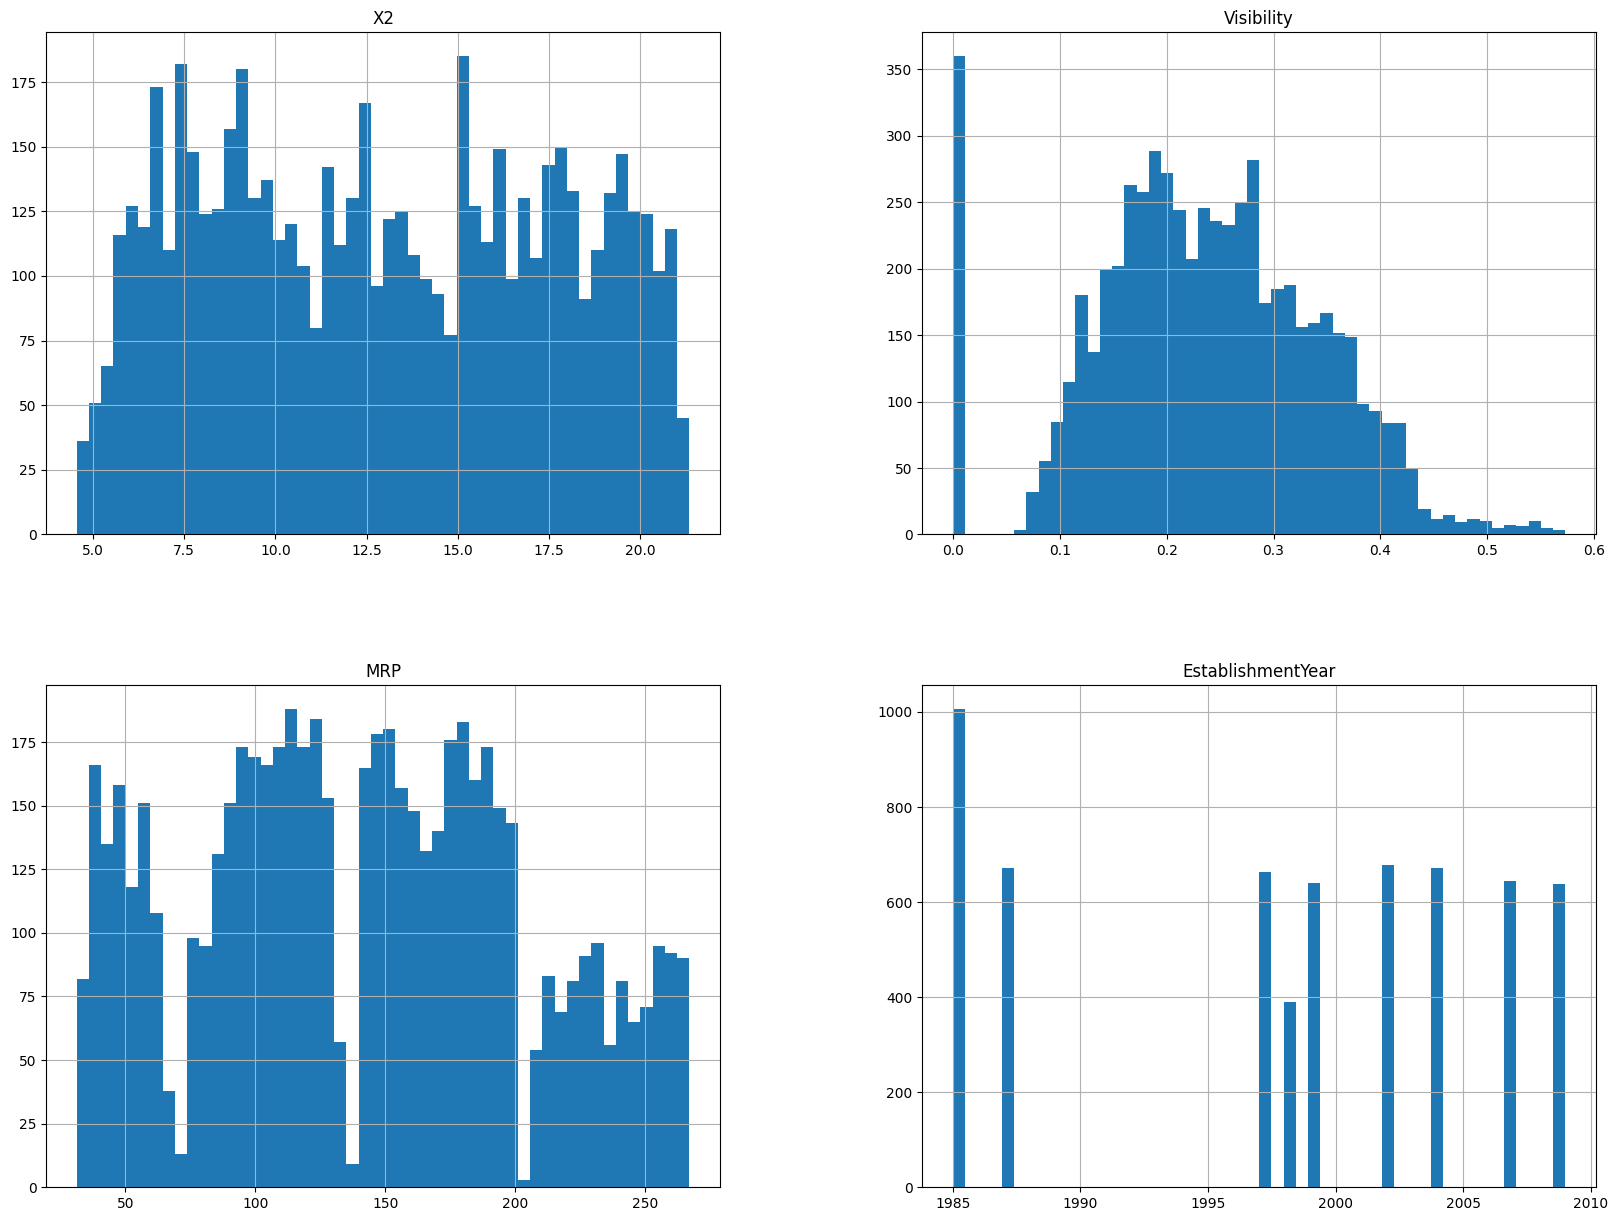

In [69]:
X.hist(bins=50, figsize=(20,15))


In [70]:
#X_trans['rareOutlierIndexSum'] = X['RareOutlierIndexSum']

#X_trans['ValueCountPercentage'] = X['ValueCountPercentage']
X_trans.head()

,MRP,TypeMeanPrice,OutletType,MRP_cluster
0,249.8092,7.535924,1.0,3.0
1,48.2692,7.245088,2.0,0.0
2,141.6180,7.549106,1.0,2.0
3,182.0950,5.542138,0.0,2.0
4,53.8614,7.559549,1.0,0.0


In [71]:
X_trans.dtypes

MRP              float64
TypeMeanPrice    float64
OutletType       float64
MRP_cluster       object
dtype: object

In [72]:
#XGBoost Best Parameters: {'n_estimators': 559, 'learning_rate': 0.1469569426264511, 'max_depth': 4, 'subsample': 0.8411487566100363, 'colsample_bytree': 0.7417715392657795, 'reg_alpha': 1.1869463034224967, 'reg_lambda': 2.486995408713364, 'min_child_weight': 4, 'gamma': 4.959905289473123, 'max_bin': 128}
#XGBoost Best MAE: 0.4008787415854136 addin feature total
# XGBoost Best Parameters: {'n_estimators': 668, 'learning_rate': 0.032577782023527645, 'max_depth': 12, 'subsample': 0.691201208532962, 'colsample_bytree': 0.558188500398105, 'reg_alpha': 2.2238020378872947, 'reg_lambda': 9.991332941305185, 'min_child_weight': 4, 'gamma': 4.263995328680427, 'max_bin': 497}
# XGBoost Best MAE: 0.4000492269897461


In [73]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Category,MRP_cluster,ItemCategory
0,FDA15,9.30,LF,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,very high,Perishable
1,DRC01,5.92,REG,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,DR,very low,Packaged
2,FDN15,17.50,LF,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,high,Perishable
3,FDX07,19.20,REG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,FD,high,Perishable
4,NCD19,8.93,nofat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,NC,very low,Others


In [84]:
import optuna
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def objective_catboost(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 800),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 3, 6),
        'subsample': trial.suggest_float('subsample', 0.5, 0.9),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 0.9),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 1, 5),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 1, 5),
        'border_count': trial.suggest_int('border_count', 32, 128),
        'loss_function': 'MAE'
    }

    # Convert categorical columns to string
    # X_trans_catboost = X_trans.copy()
    # for col in X_trans_catboost.select_dtypes(include=['category']).columns:
    #     X_trans_catboost[col] = X_trans_catboost[col].astype(str)
    smoothing = trial.suggest_float('smoothing', 0.1, 5)
    preprocessor.set_params(
        type_mean_price__type_mean_price_transformer__smoothing=smoothing
    )
    # Create a pipeline with the final transformer and CatBoost regressor
    model = CatBoostRegressor(**param, verbose=0, cat_features=['MRP_cluster'], early_stopping_rounds=50)
    pipeline = Pipeline([
        ('final_transform', final_pipeline),
        ('catboost', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X, Y, cv=5, scoring='neg_mean_absolute_error')
    mae = -scores.mean()
    return mae

# Create an Optuna study and optimize the objective function
study_catboost = optuna.create_study(direction='minimize')
study_catboost.optimize(objective_catboost, n_trials=10)

# Print the best parameters and MAE
print("CatBoost Best Parameters:", study_catboost.best_params)
print("CatBoost Best MAE:", study_catboost.best_value)


[I 2024-12-27 23:33:22,026] A new study created in memory with name: no-name-b4522202-6072-4d67-8a93-4ee148a5e1c7
[W 2024-12-27 23:33:29,269] Trial 0 failed with parameters: {'iterations': 443, 'learning_rate': 0.012534507316924914, 'depth': 6, 'subsample': 0.8741949891777723, 'colsample_bylevel': 0.7107168500089838, 'l2_leaf_reg': 6.70648339727839, 'random_strength': 3.5754568798092823, 'bagging_temperature': 3.426591109675745, 'border_count': 115, 'smoothing': 3.059655015993975} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "c:\Users\shels\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\shels\AppData\Local\Temp\ipykernel_29752\238132203.py", line 36, in objective_catboost
    scores = cross_val_score(pipeline, X, Y, cv=5, scoring='neg_mean_absolute_error')
             ^^^^^^^^^^^^^^^^^^^^

KeyboardInterrupt: 

In [88]:
X_trans.dtypes

MRP              float64
TypeMeanPrice    float64
OutletType       float64
MRP_cluster       object
dtype: object

In [89]:
from catboost import CatBoostRegressor

# Define the CatBoost model with the specified parameters
catboost_params = {
    'iterations': 664,
    'learning_rate': 0.0362387234017892,
    'depth': 3,
    'subsample': 0.7999456005681143,
    'colsample_bylevel': 0.7763198164104148,
    'l2_leaf_reg': 5.466280028000805,
    'random_strength': 1.1183292594718606,
    'bagging_temperature': 3.5375530112539995,
    'border_count': 105,
    'loss_function': 'MAE',
    'verbose': 0
}
# Update the preprocessor with the new smoothing factor
smoothing = 0.4966048630439446

preprocessor.set_params(
    type_mean_price__type_mean_price_transformer__smoothing=smoothing
)
# Create the CatBoost model
catboost_model = CatBoostRegressor(**catboost_params, cat_features=['MRP_cluster'])
# Create the pipeline with final_pipeline and the CatBoost model
cat_pipeline = Pipeline([
    ('final_preprocessor', final_pipeline),
    ('catboost', catboost_model)
])
#cat_pipeline.fit(X,Y)

In [90]:
test_data = pd.read_csv("test.csv")
test_data.columns = ["ItemID","X2", "FatContent", "Visibility", "Type", "MRP", "OutletID",
  "EstablishmentYear", "Size", "Location_Type", "Outlet_Type"]
test_data['MRP_cluster']=pd.cut(test_data['MRP'],bins=[25,69,137,203,270],labels=['very low','low','high','very high'],right=True)
test_data["FatContent"] = test_data["FatContent"].replace({"low fat": "LF", "Low Fat": "LF", "Regular": "REG", "reg": "REG"})
test_data.MRP_cluster = test_data.MRP_cluster.astype(str)
test_data.head()


,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,MRP_cluster
0,FDO37,NaN,LF,0.021273,Breakfast,229.1326,OUT027,1985,Medium,Tier 3,Supermarket Type3,very high
1,FDV13,17.35,REG,0.027588,Canned,86.1856,OUT013,1987,High,Tier 3,Supermarket Type1,low
2,FDF52,9.30,LF,0.111782,Frozen Foods,182.3292,OUT010,1998,NaN,Tier 3,Grocery Store,high
3,FDY11,6.71,REG,0.029606,Baking Goods,65.4142,OUT049,1999,Medium,Tier 1,Supermarket Type1,very low
4,FDL20,17.10,LF,0.129141,Fruits and Vegetables,109.4886,OUT017,2007,NaN,Tier 2,Supermarket Type1,low


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [95]:
if isinstance(X_train, pd.Series):
    X_train = X_train.to_frame()
if isinstance(Y_train, pd.Series):
    Y_train = Y_train.to_frame()
if isinstance(Y_test, pd.Series):
    Y_test = Y_test.to_frame()



In [96]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    tick_labels_dict = {"tick_labels": X.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False, **tick_labels_dict)
    ax.axvline(x=0, color="k", linestyle="--")
# Assuming `pipeline` is already fitted

In [546]:
#X_transformed_test = final_pipeline.transform(X_test)

In [110]:
Y_test = pd.DataFrame(Y_test, columns=['Y']).reset_index(drop=True)
Y_test.shape

(1200, 1)

In [104]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Train the cat_pipeline on X_train
cat_pipeline.fit(X_train, Y_train)
# Predict on X_test
predictions = cat_pipeline.predict(X_test)
predictions.shape

(1200,)

In [112]:

predictions = pd.DataFrame(predictions, columns=['Y']).reset_index(drop=True)
predictions.shape
# Calculate residuals


(1200, 1)

In [113]:
total = pd.concat([Y_test, predictions], axis=1)
total.head()

,Y,Y
0,7.35,7.521036
1,8.44,8.363790
2,7.26,7.151040
3,5.90,6.129983
4,6.31,5.951723


In [114]:
resid = Y_test - predictions
print(resid.shape)
print(predictions.shape)


(1200, 1)
(1200, 1)


In [116]:

# Calculate residuals
residuals = Y_test - predictions
print(residuals.shape)
print(predictions.shape)


(1200, 1)
(1200, 1)


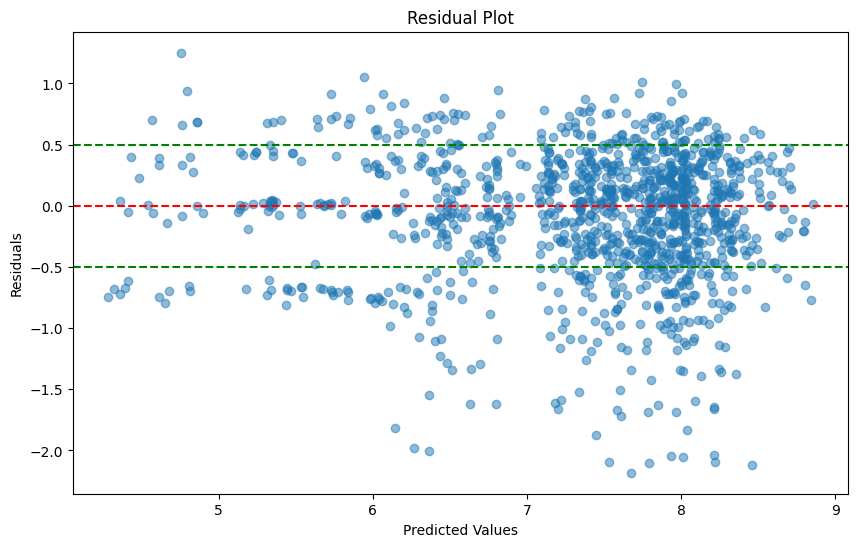

Mean Absolute Error: 0.412068726483898


In [118]:
# Plot the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.axhline(y=-0.5, color='g', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
# Print Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Mean Absolute Error: {mae}')

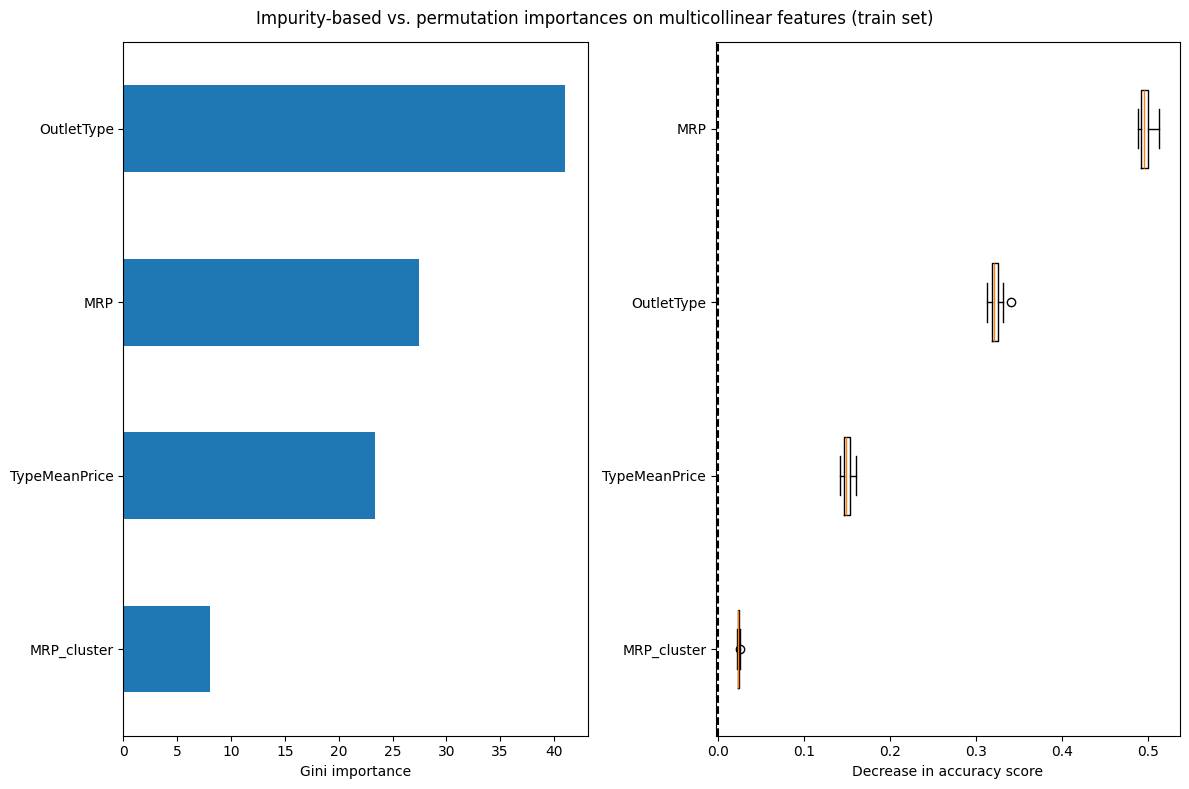

In [1942]:
# Fit the pipeline
cat_pipeline.fit(X_train, Y_train)

# Transform the training data
X_train_transformed = cat_pipeline.named_steps['final_preprocessor'].transform(X_train)

# Calculate feature importances
mdi_importances = pd.Series(cat_pipeline.named_steps['catboost'].feature_importances_, index=X_train_transformed.columns)
tree_importance_sorted_idx = np.argsort(cat_pipeline.named_steps['catboost'].feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot Gini importance
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")

# Plot permutation importance
plot_permutation_importance(cat_pipeline.named_steps['catboost'], X_train_transformed, Y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")

fig.suptitle("Impurity-based vs. permutation importances on multicollinear features (train set)")
fig.tight_layout()
plt.show()

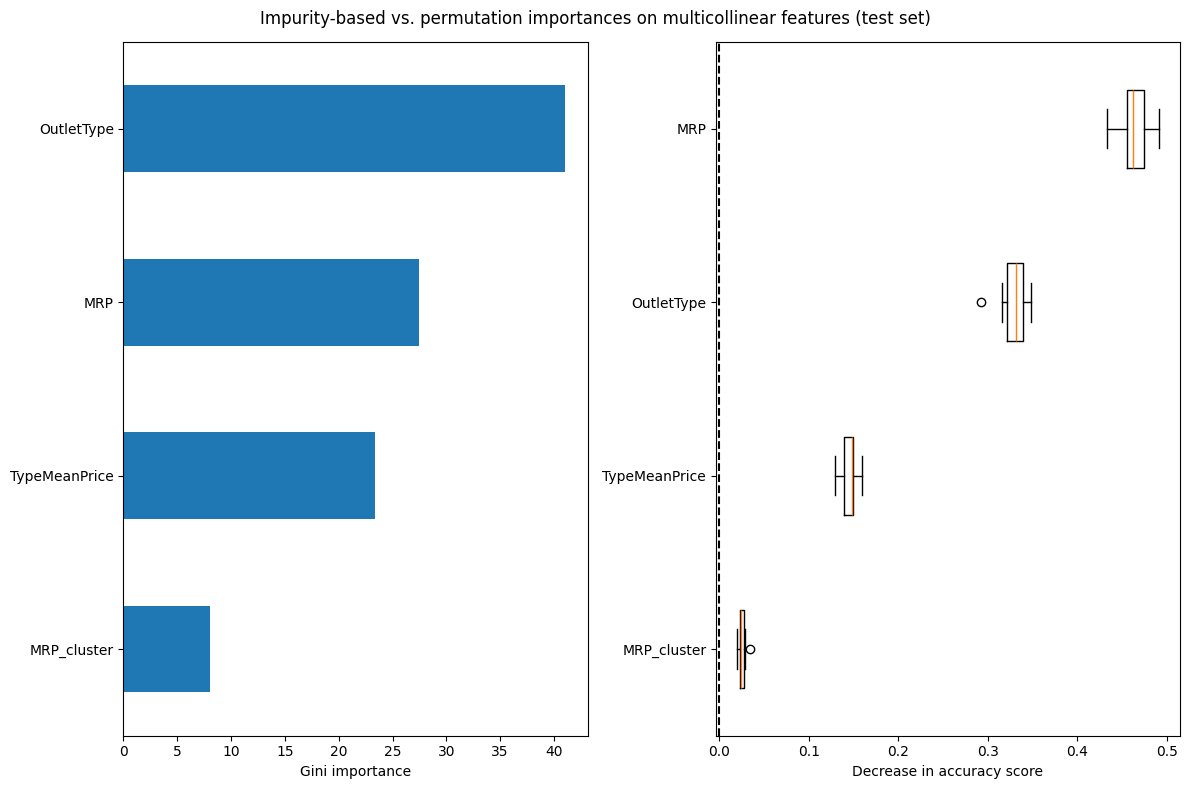

In [1943]:
# Transform the test data
X_test_transformed = cat_pipeline.named_steps['final_preprocessor'].transform(X_test)

# Calculate feature importances for test data
mdi_importances_test = pd.Series(cat_pipeline.named_steps['catboost'].feature_importances_, index=X_test_transformed.columns)
tree_importance_sorted_idx_test = np.argsort(cat_pipeline.named_steps['catboost'].feature_importances_)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# Plot Gini importance for test data
mdi_importances_test.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
# Plot permutation importance for test data
plot_permutation_importance(cat_pipeline.named_steps['catboost'], X_test_transformed, Y_test, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle("Impurity-based vs. permutation importances on multicollinear features (test set)")
fig.tight_layout()
plt.show()